In [1]:
import json
import pandas as pd
import seaborn as sns
import os
from glob import glob

In [2]:
directory_path_wo = './lighthouse_performance/wo_plugin/'
directory_path_w = './lighthouse_performance/w_plugin/'

In [3]:
json_files_wo = glob(os.path.join(directory_path_wo, '*.json'))
json_files_w = glob(os.path.join(directory_path_w, '*.json'))

In [4]:
all_data_wo = []
filenames_wo = []

all_data_w = []
filenames_w = []

In [5]:
for file_path in json_files_wo:
    filename = os.path.basename(file_path)
    # Load the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract the items from the specified path
    if 'audits' in data and 'metrics' in data['audits'] and 'details' in data['audits']['metrics'] and 'items' in data['audits']['metrics']['details']:
        first_item = data['audits']['metrics']['details']['items'][0]
        # Add the item to our list
        all_data_wo.append(first_item)

        # Add the filename to our list
        filenames_wo.append(filename)

In [6]:
for file_path in json_files_w:
    filename = os.path.basename(file_path)
    # Load the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract the items from the specified path
    if 'audits' in data and 'metrics' in data['audits'] and 'details' in data['audits']['metrics'] and 'items' in data['audits']['metrics']['details']:
        first_item = data['audits']['metrics']['details']['items'][0]
        # Add the item to our list
        all_data_w.append(first_item)

        # Add the filename to our list
        filenames_w.append(filename)

In [7]:
df_wo = pd.DataFrame(all_data_wo, index=filenames_wo)
df_w = pd.DataFrame(all_data_w, index=filenames_w)

In [8]:
df_wo[['firstContentfulPaint', 'largestContentfulPaint', 'speedIndex']].median()

firstContentfulPaint      410.5
largestContentfulPaint    501.0
speedIndex                423.0
dtype: float64

In [9]:
df_w[['firstContentfulPaint', 'largestContentfulPaint', 'speedIndex']].median()

firstContentfulPaint      487.0
largestContentfulPaint    748.0
speedIndex                521.5
dtype: float64

In [10]:
df_wo_metrics = df_wo[['firstContentfulPaint', 'largestContentfulPaint', 'speedIndex']].copy()
df_w_metrics = df_w[['firstContentfulPaint', 'largestContentfulPaint', 'speedIndex']].copy()

df_wo_metrics['plugin'] = 'inactive'
df_w_metrics['plugin'] = 'active'

combined_df = pd.concat([df_wo_metrics, df_w_metrics])

combined_df

,firstContentfulPaint,largestContentfulPaint,speedIndex,plugin
20250327_133233_wo_plugin.json,465,505,489,inactive
20250327_133114_wo_plugin.json,411,502,424,inactive
20250327_133512_wo_plugin.json,410,501,425,inactive
20250327_133336_wo_plugin.json,411,502,419,inactive
20250327_133352_wo_plugin.json,411,502,423,inactive
20250327_133249_wo_plugin.json,411,501,412,inactive
20250327_133408_wo_plugin.json,408,498,424,inactive
20250327_133320_wo_plugin.json,412,502,434,inactive
20250327_133058_wo_plugin.json,410,500,421,inactive
20250327_133217_wo_plugin.json,414,506,419,inactive


In [11]:
sns.set_theme(style='whitegrid')

In [12]:
combined_df_long = pd.melt(combined_df, 'plugin', var_name='metric', value_name='ms')
combined_df_long

,plugin,metric,ms
0,inactive,firstContentfulPaint,465
1,inactive,firstContentfulPaint,411
2,inactive,firstContentfulPaint,410
3,inactive,firstContentfulPaint,411
4,inactive,firstContentfulPaint,411
...,...,...,...
115,active,speedIndex,528
116,active,speedIndex,507
117,active,speedIndex,532
118,active,speedIndex,520


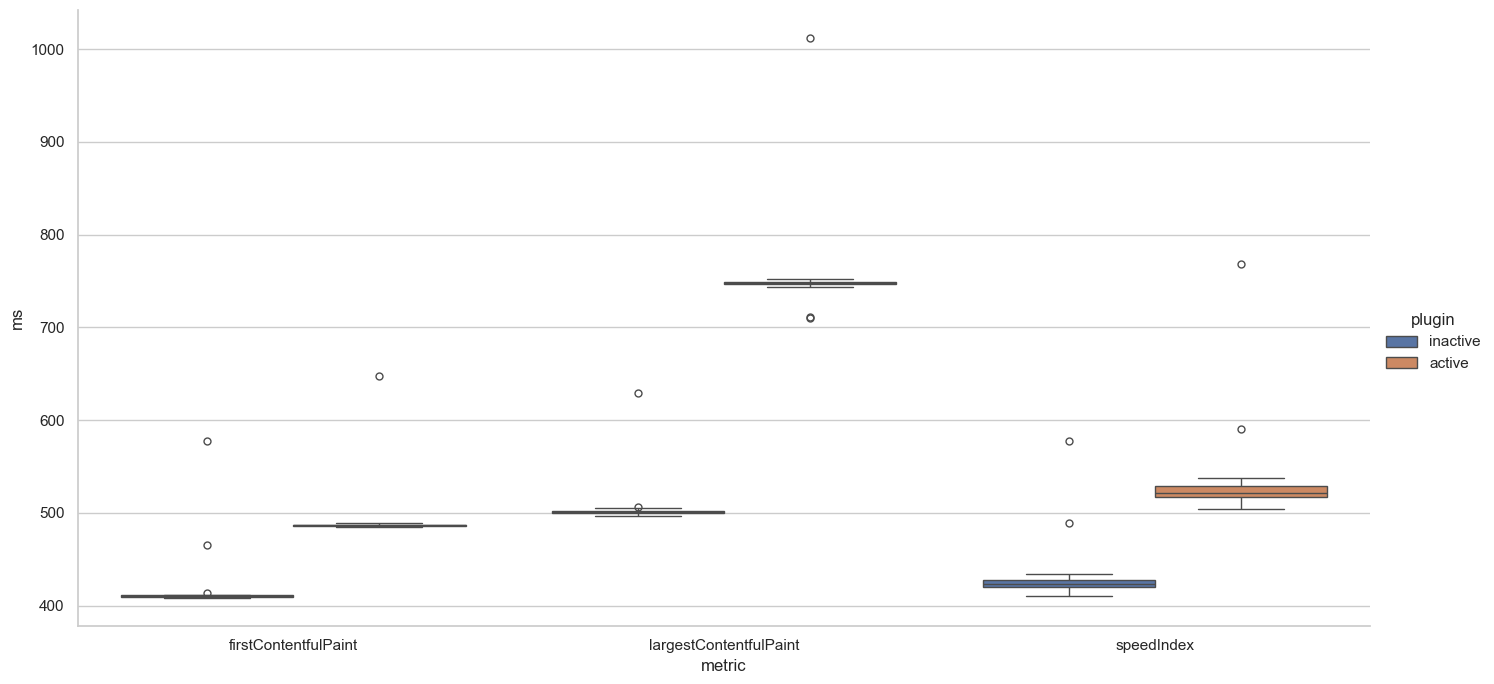

In [13]:
sns.catplot(data=combined_df_long, x='metric', y='ms', hue='plugin', kind='box', height=7, aspect=2)

<Axes: ylabel='firstContentfulPaint'>

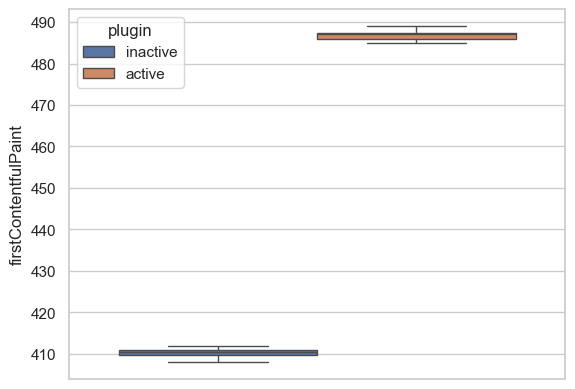

In [14]:
sns.boxplot(data=combined_df, y='firstContentfulPaint', hue='plugin', showfliers=False)

<Axes: ylabel='largestContentfulPaint'>

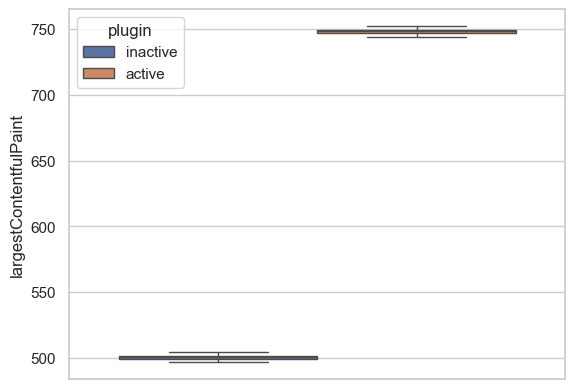

In [15]:
sns.boxplot(data=combined_df, y='largestContentfulPaint', hue='plugin', showfliers=False)


<Axes: ylabel='speedIndex'>

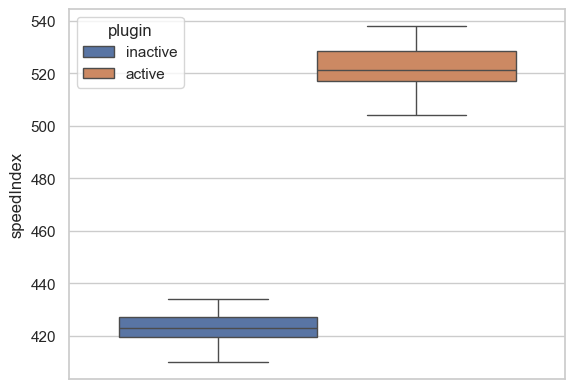

In [16]:
sns.boxplot(data=combined_df, y='speedIndex', hue='plugin', showfliers=False)